# Ideal Lowpass Filter

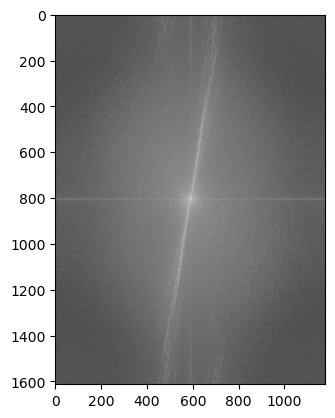

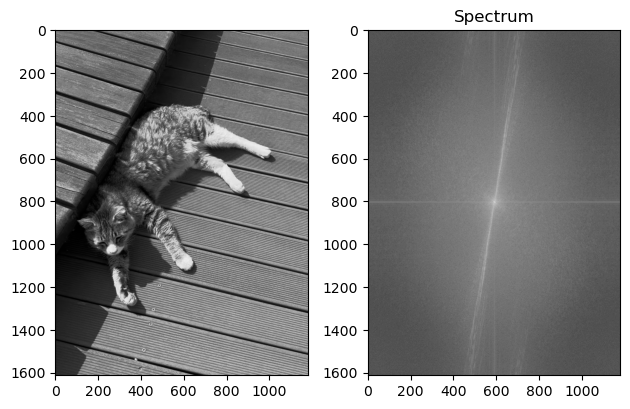

In [15]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path = '/Users/jeonhyeonbin/Library/Mobile Documents/com~apple~CloudDocs/POSTECH/계산사진학/assn1/assn2/images/cat.jpg'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)/255.
f = np.fft.fft2(img) 

spectrum = np.log(np.abs(f))

plt.imshow(np.fft.fftshift(spectrum), cmap = 'gray')
plt.show()


# 왼쪽: 그레이스케일 원본 이미지
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')

# 오른쪽: 스펙트럼(로그 스케일)
plt.subplot(1, 2, 2)
plt.imshow(np.fft.fftshift(spectrum), cmap='gray')
plt.title('Spectrum')

plt.tight_layout()
plt.show()

In [ ]:
img_path = 'cat.jpg'

In [3]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)/255.0

F = np.fft.fft2(img)        # 2D DFT
F_shifted = np.fft.fftshift(F) # 저주파를 중심으로 shift

In [4]:
def ideal_lowpass_filter(shape, cutoff):
    """
    shape: (P, Q) 형태
    cutoff: 차단 주파수 반경(D0)
    """
    P, Q = shape
    # 주파수 좌표계 (u, v) 생성
    u = np.arange(P)
    v = np.arange(Q)
    U, V = np.meshgrid(u, v, indexing='ij')
    
    # 중심좌표(DC 성분)가 (P/2, Q/2)가 되도록
    center_u, center_v = P//2, Q//2
    dist = np.sqrt((U - center_u)**2 + (V - center_v)**2)
    
    # 이상적 저주파 필터: dist <= cutoff 이면 1, 아니면 0
    H = np.zeros((P, Q), dtype=np.float32)
    H[dist <= cutoff] = 1.0
    return H

In [5]:
def do_ilf(ideal_filter):
    I_filtered_shifted = F_shifted * ideal_filter
    I_filtered = np.fft.ifftshift(I_filtered_shifted)
    i_img = np.fft.ifft2(I_filtered)
    i_img = np.real(i_img)
    i_result = i_img[:M, :N]
    
    return i_result

In [7]:
M, N = img.shape
P, Q = 2*M, 2*N  # 패딩 후 크기(2배)
padded = np.zeros((P, Q), dtype=img.dtype)
padded[:M, :N] = img  # 왼쪽 상단에 원본 이미지 복사

In [8]:
# --------------------------------------------------
# 5) 여러 cutoff(σ) 값에 대해 필터링 & 시각화
# --------------------------------------------------
cutoff_values = [10, 30, 60, 90]  # 원하는 값을 자유롭게 지정

for cutoff in cutoff_values:
    ideal_filter = ideal_lowpass_filter((P, Q), cutoff)
    ideal_filter_spectrum = np.fft.fftshift(ideal_filter)
    lpf_img = do_ilf(ideal_filter)

    plt.subplot(1, 2, 2)
    plt.imshow(lpf_img, cmap='gray')
    plt.title(f'Ideal LPF Result (cutoff={cutoff})')
    plt.show()



ValueError: operands could not be broadcast together with shapes (1613,1179) (3226,2358) 